# HAL O World
> **HAL :** Just what do you think you're doing, Dave?.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/posts/2020-12-01-HAL-0-World/HAL-0-World.jpg

# Learning to Deep Learn . . .

So today is a monumental day in the field of deep learning, [AlphaFold](https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology) by [DeepMind](https://deepmind.com/) has been recognised as a solution to the [“protein folding problem”](https://en.wikipedia.org/wiki/Protein_folding) and marks the end of a challenge set over 50 years ago. This breakthrough demonstrates the impact AI can have on scientific discovery and its potential to dramatically accelerate progress in some of the most fundamental fields that explain and shape our world. So now is as good a time as any to really get involved and start learning to Deep Learn.

# Deep Learning for Coders

To ensure that I am making good progress, creating practical models and work as effectiently as possible I will be working through the book ["Deep Learning for Coders with fastai and PyTorch"](https://course.fast.ai/), not only is there a great online portal with a video walk through of the curriculum, an incredible and very well presented book, but also all the source (not only for the practical work, but also for the entire book! It was all written in jupyter notebooks, how amazing is that!). 

## Getting Setup

So far I have made it through a couple of chapters of the book, and as reccomended by the course I am starting a "Deep Learning Journal", just a place online that I can track my progress, thoughts and experiments as I progress through the curriculum. There are a couple of steps that are required to get setup to make the most of the work presented, and I thought that a good place to start a blog is with some notes on how to get setup.

### Juypter Notebooks

Working as a Technical Animator in video games and having written Python code for nearly a decade now, I was aware of juypter notebooks, but I felt that as it was only useful for creating "pretty comments" inline with your code. Yes it would be cool to have an animated gif as part of your documentation but how useful are they in reality? It turns out that they are awesome! I am writing this very blog post using them right now and I am really impressed. The fastai team have created this entire blogging platform `fastpages` to help people get up and running quickly. Jeremy from fastai has also created a great talk about the power of notebooks and their platform `nbdev` here which is worth a watch. 

> youtube: https://www.youtube.com/watch?v=9Q6sLbz37gk

#### Anaconda Navigator

Getting set up with juypter on Windows 10 is painless, there is an incredible tool called [Anaconda Navaigator](https://www.anaconda.com/products/individual), an all in one data science toolkit for python that can also manage your packages and your environments through a simple interface. No more package dependency hell, especially when installing large packages for deep learning. Simply follow the link above and download the graphical installer for your OS. Once installed, you can launch your juypter notebook environment here:

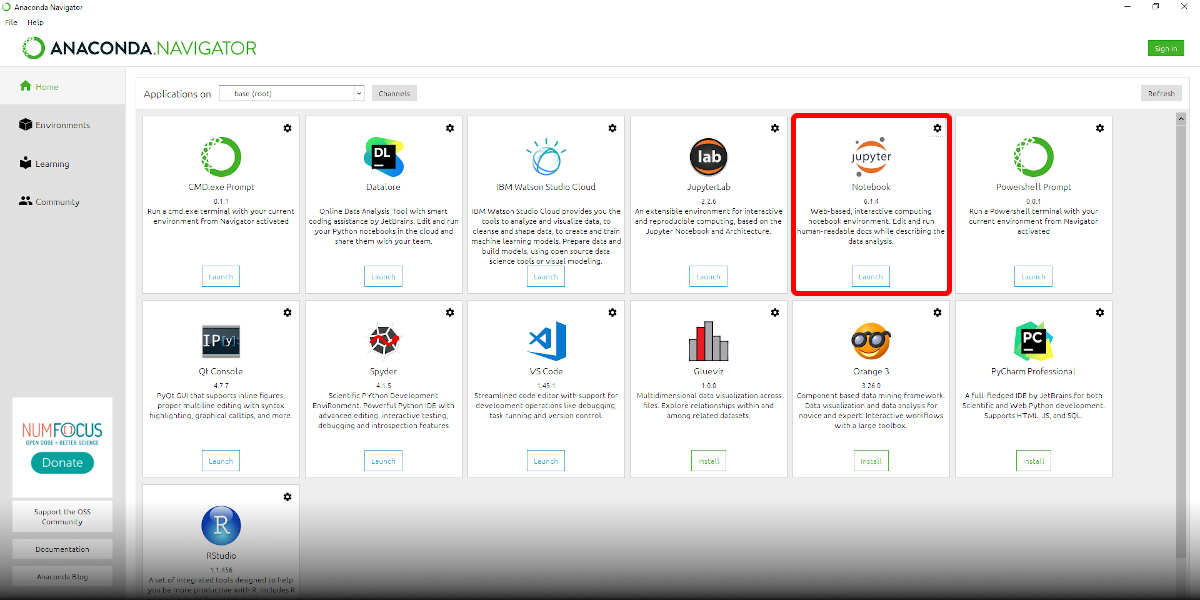

#### Fastpages

Fastpages the platform I am using to setup your blog is incredibly simple and the team at fast.ai have documented the process amazingly, simply stepping through the documentation will allow you to copy their directory as a template along with all of the GitHub actions that will build and display your blog. You can see the documentation [here](https://github.com/fastai/fastpages#welcome-to-fastpages)

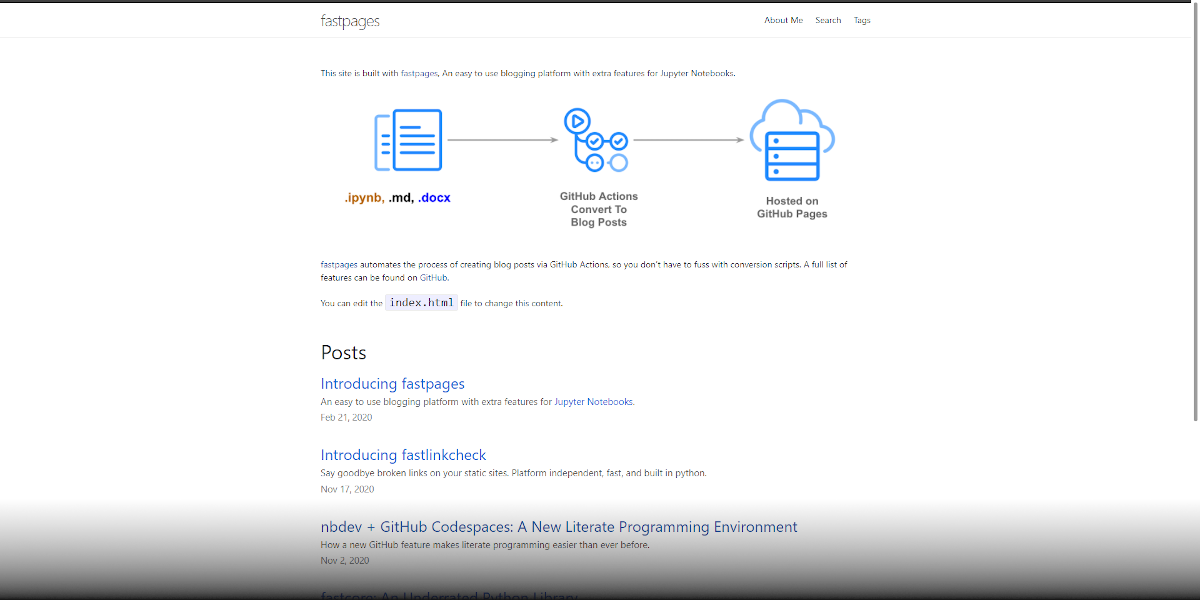

### Paperspace Gradient

Another fantastic facet of the course is that they don't encourage you to wade into the murky world of systems administration setting up packages, environments and GPU compliant kernels to get you up and running working with state-of-the-art deep learning models. They instead encourage you to look into using a Server Notebook, they reccommend either [Collab](https://course.fast.ai/start_colab), [Gradient](https://course.fast.ai/start_gradient) or [Sagemaker](https://course.fast.ai/start_sagemaker). I chose [Paperspace Gradient](https://console.paperspace.com/) and I am very happy with my choice.

### Microsoft Azure

By far the most frustrating part of the set up for the course has nothing to do with Python, the notebook server, GitHub or fast.ai. In Chapter 2 of the book, the course encourages you to set up a Microsoft Azure account to get an API key so you can use their Image Search conginitive service to pull training images from the web to train a classifier model. Unfortunately the documentation on the site and the forum isn't incredibly helpful, so I am logging it here incase anyone should find it useful, but mainly if I have to do this again on another account I can remeber how and where to find everything.

1. Go to: https://azure.microsoft.com/en-gb/services/cognitive-services/

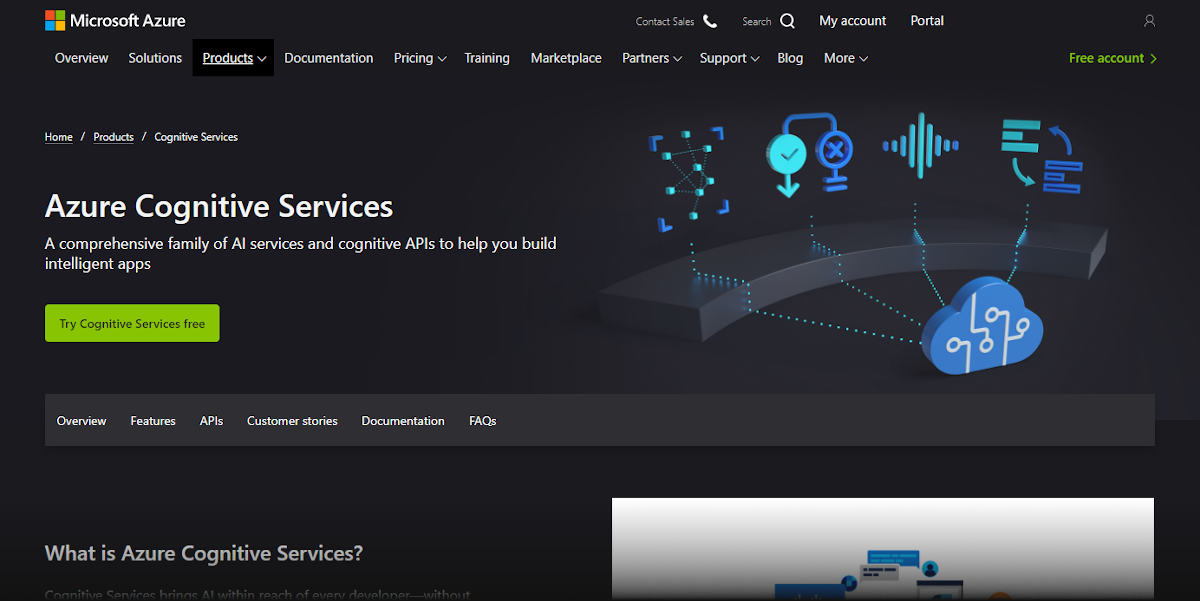

2. Scroll to the API's section of the page, and select "Web Search"

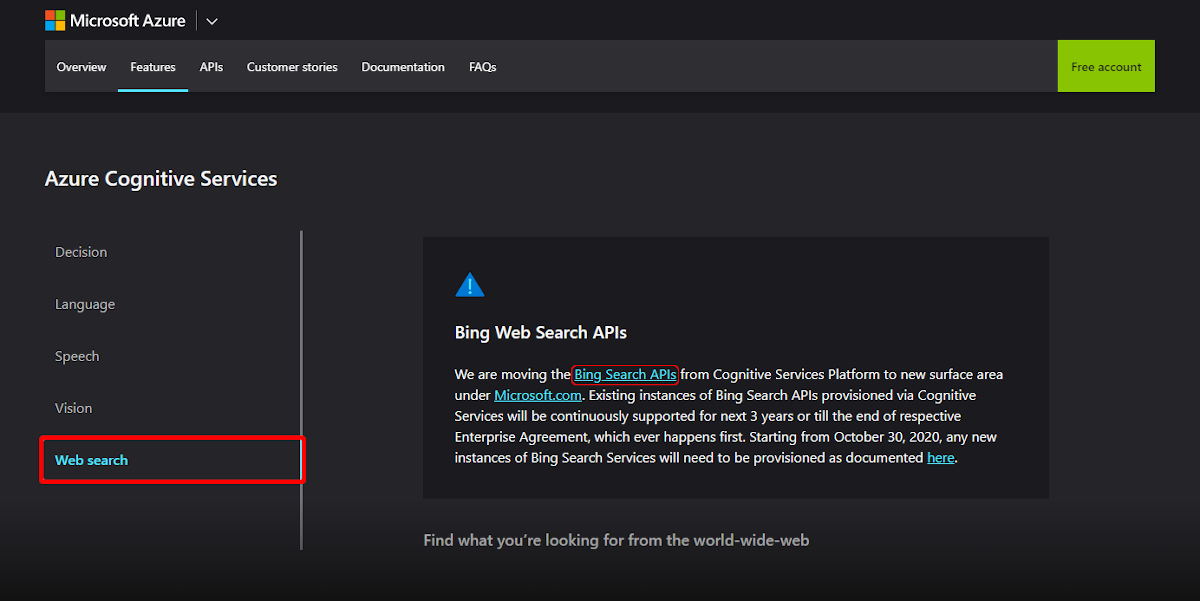

3. this will redirect you to https://www.microsoft.com/en-us/bing/apis/bing-web-search-api

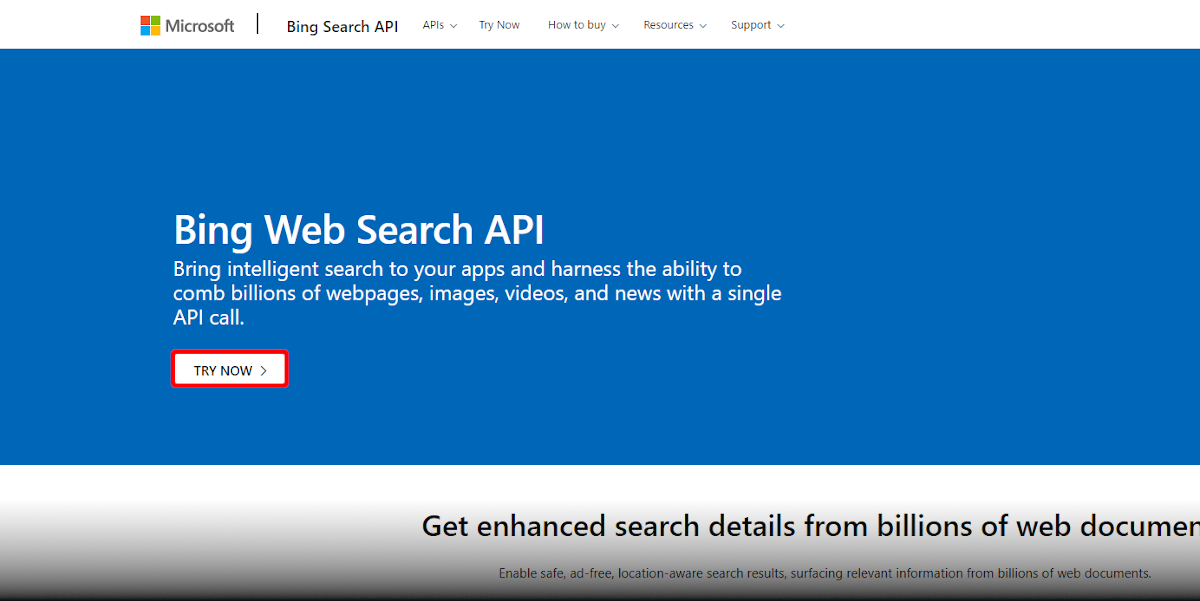

4. Ensuring you already have an Azure account, this will take you to the console to create a Bing resource

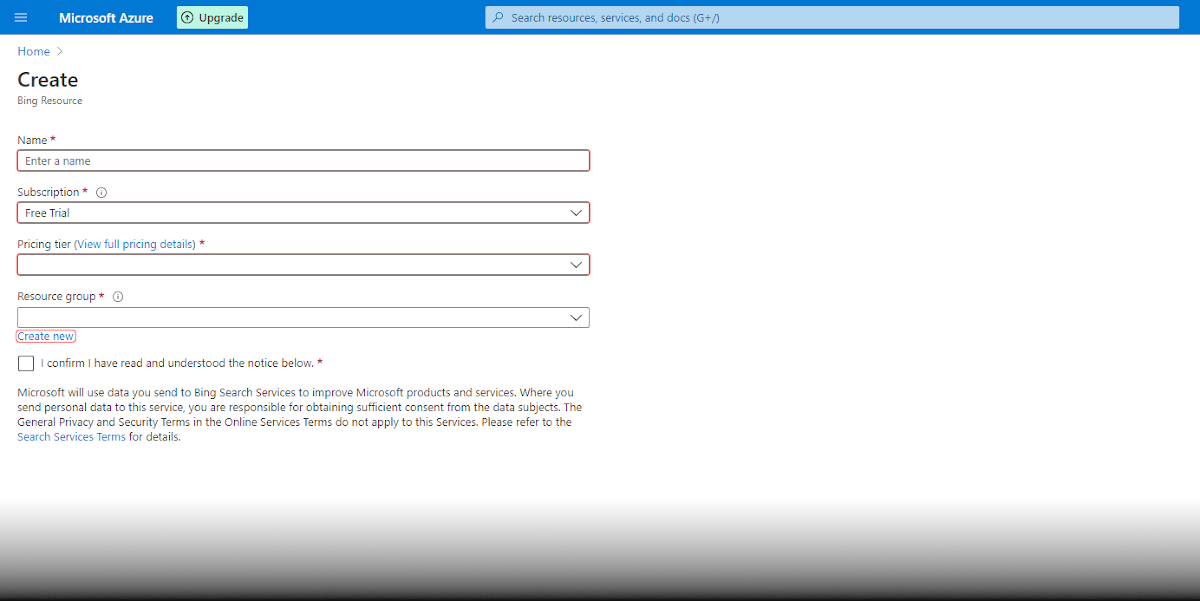

5. Once you have filled in the details and created your resource it will take you to your Azure dashboard

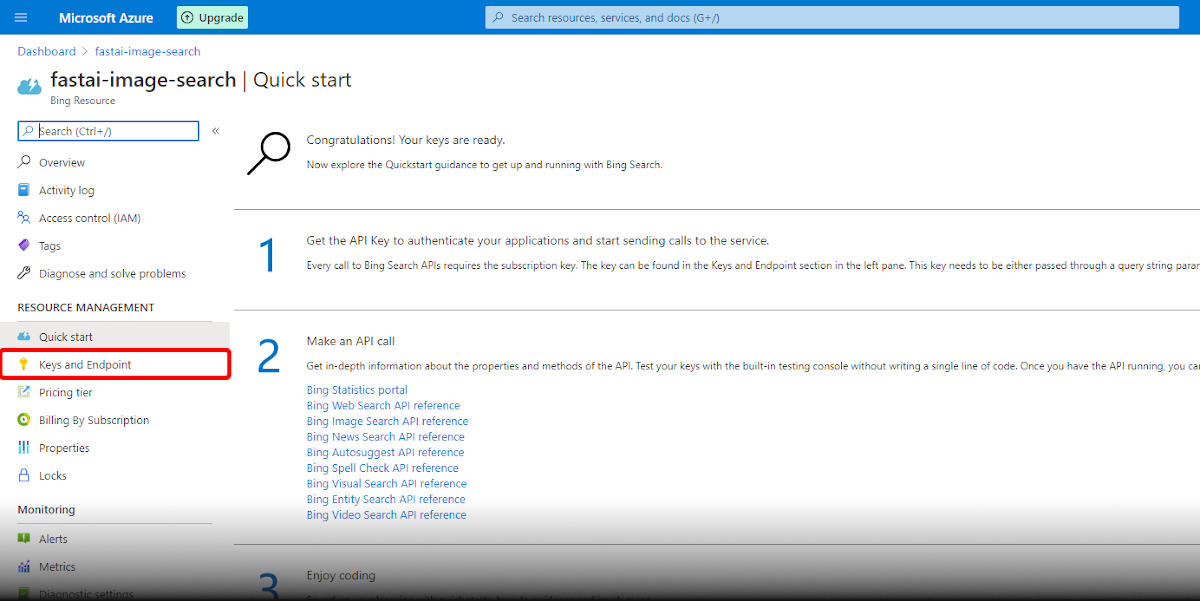

6. Go to the "Keys and Endpoint" tab, this is where you can find your Bing Image Search Api Key

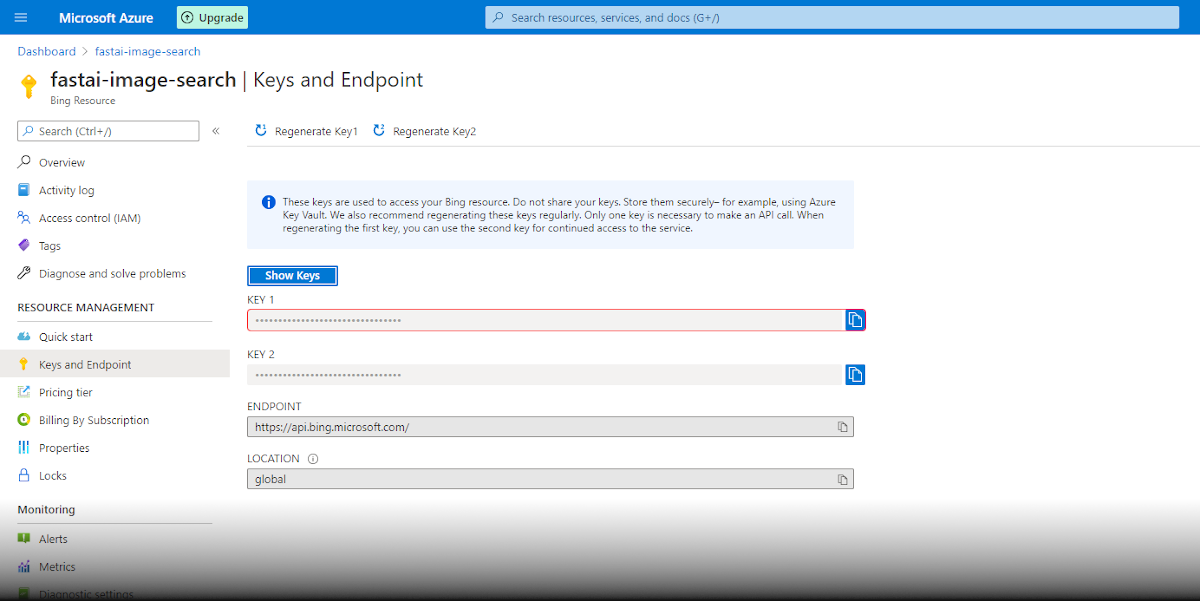

Now that you have your API key and replaced the `XXX` value in the Chapter 2 notebook, there is once more piece of code required to get the code in Chapter to work, below is a re-write of the `search_images_bing` definition, simply paste it as a code cell above where it is being called in notebook. Everything should work for you now.

In [ ]:
def search_images_bing(subscription_key, search_term, size = 150):
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

    params  = {"q": search_term, 
               "license": "public", 
               "imageType": "photo",
               "count": size}

    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    
    reformatted_results = L(search_results["value"], use_list=True)
    # Uses the FastAI class L, a
    # "drop-in" replacement for Lists. Mixes Python standard library and numpy arrays.
    # I'm putting this here so, again, we minimize the amount of individual cells rewritten.
    # Many of the later cells assume .attrgot is a valid thing you can call.
    
    for result in reformatted_results:
        result["content_url"] = result["contentUrl"]
    # Bing changed their API. They return contentUrl instead of content_url. 
    # Again, this will help in the long run. 
    
    return reformatted_results